# Lab 8: Boundary value problems (BVPs) in 2D

---

* *This collection of exercises is meant for you to practice this week's contents. It contains problems for which computer code, hand work, or both are required. This is noted for each individual problem with ```Python```, ```Hand```, or ```Both```, respectively.*
* *Labs are not marked. Their aim is to get prepared for the assessments.*
* *Exercises marked with an asterisk are recommended to be attempted during the lab session.*

*Solutions will be made available on the Tuesday following the lab.*

---

### 1. Inhomogeneous Dirichlet condition*

We want to solve the partial differential equation (PDE)

<br />

$$
\frac{\partial^2 U(x,y)}{\partial x^2}+\frac{\partial^2 U(x,y)}{\partial y^2}=3x+2y,
$$

<br />

subject to Dirichlet boundary conditions with $g_1(x,y)=y$, $g_2(x,y)=e^{x+y}$, and $g_3(x,y)=x$ (see figure below; $h=k=1/4$).

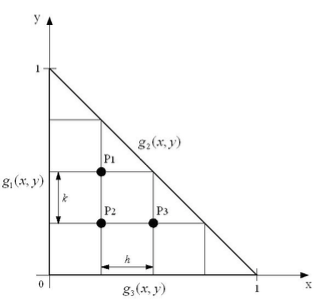

***1.1.*** Discretise the partial differential equation using a centred difference scheme with error $O(h^2)$ in each dimension and present the stencil for the given problem. ``[Hand]``


***1.2.*** Use the stencil derived in the previous point to present the system of equations to solve. Find the solutions for the problem at $P_1$, $P_2$ and $P_3$. ``[Hand]``


***1.3.*** Explain how to compute the numerical solution if the condition on $g_1$ (left hand side of the triangle) changes to a Neumann boundary condition. How many ghost points would we need? ``[Hand]``

### 2. Not everything is symmetric*

We want to compute the parameter $H$ in a two dimensional bar of size 3 $\times$ 400 as shown in the figure below (we assume all parameters are in the corresponding units). The parameter $H$ satisfies the equation

<br />

$$
\frac{\partial H(x,y)}{\partial x} + \frac{\partial^2 H(x,y)}{\partial y^2}=0,
$$

<br />

and is subject to the boundary conditions $H(0,y)=10y$, $H(x,3)=30+10x$, and $H(x,0)=10x$.   


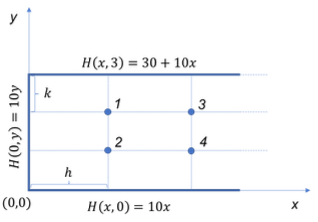

***2.1.*** Discretise the partial differential equation using a centred difference scheme with error $O(h^2)$ in each dimension and present the corresponding stencil. What is the order of the truncation error of the resulting methodology? ``[Hand]``


***2.2.*** If we are interested in computing the parameter $H$ at the very end of the bar only (as shown in the figure), which problems do you envisage for using the centred-difference stencil? ``[Hand]``


***2.3.*** To solve the problems from the previous point, a student proposes to use an asymmetric stencil based on lower order differentials. Find the stencil using a centred difference approximation in the $y$ direction and a backward difference in the $x$ direction. ``[Hand]``


***2.4.*** Using the stencil found in the previous point, calculate the numerical solution at nodes 1 and 2 in the figure considering a step size $h=2$ in the $x$ direction, and $k=h / 2$ in the $y$ direction. ``[Hand]``

### 3. A strange fridge*

We aim to solve Poisson's equation in a square where all sides are subject to null Neumann BCs, i.e., with the differential of the solution normal to the boundary being zero on every side of the domain. Differently from the previous cases, **we have sources** of heat/cold within the domain, making $f(x_1,y_1)=1$ and $f(x_{-1},y_{-1})=-1$ at some arbitrary source $(x_1,y_1)$ and sink $(x_{-1},y_{-1})$ locations, respectively, and $f(x,y)=0$ elsewhere.

<br />

***3.1.*** Explain why the following function implements the system matrix of the full (zero) Neumann problem. ``[Hand & Python]``

<br />

&nbsp; &nbsp;***Hint*** you may want to discretise the boundary condition on the boundary of the rectangular grid.


```python
def matrix_A_m(II): # all sides
    sx, sy = np.shape(II) # size of the interior domain
    n = sx * sy # number of unknowns
    # Build the matrix
    d0 = -4 * np.ones(n)
    d1r = np.ones(n-1); d1r[sx-1::sx] = 0; d1r[0::sx] = 2
    d1l = np.ones(n-1); d1l[sx-1::sx] = 0; d1l[sx-2::sx] = 2
    dsr = np.ones(n-sx); dsr[0:sx-1] = 2
    dsl = np.ones(n-sx); dsl[-sx::] = 2
    # solve
    A = sps.diags([d0,d1r,d1l,dsr,dsl], [0,1,-1,sx,-sx], format='csr')  
    return A
```


***3.2.*** Show that the independent vector is full of zeros, with the exception of the elements corresponding to the locations of the source and sink (with values $h^2$ and $-h^2$, respectively). Write a function in Python implementing it. ``[Hand & Python]``


***3.3.*** Choose two arbitrary points within the domain and solve the system of equations using them as source and sink. Plot the results, including the streamlines indicating the heat flow. Do they make sense? ``[Python]``

<br />

&nbsp; &nbsp;***Note***: This mathematical model is exactly the same used to simulate electromagnetic brain activity generated by neural current sources. Since the current cannot leave the head (!), Neumann BCs are required!